In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
sb.set()

In [2]:
sonar = pd.read_csv('sonar.csv', header = None)
sonar

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
y = sonar.iloc[:,60]
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [4]:
x = sonar.iloc[:,0:60]
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [5]:
x.isnull().sum().sum()

0

In [6]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


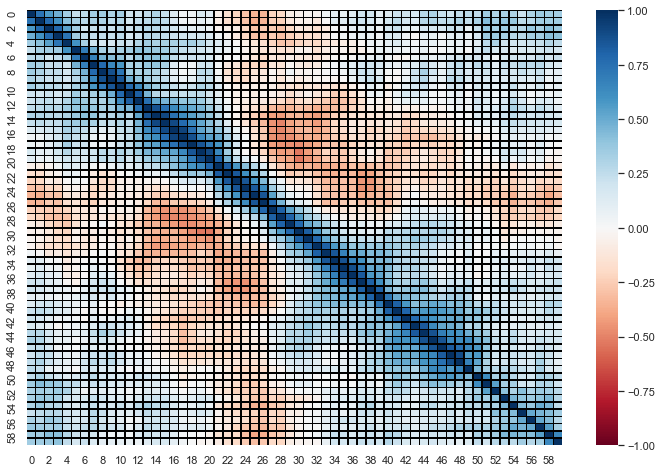

In [7]:
plt.figure(figsize = (12,8))
sb.heatmap(x.corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black')

In [9]:
z = abs(zscore(x))

In [10]:
# here we are using z threshold as 3 to filter out outliers.
sonar_new = sonar[(z<3).all(axis =1)]

In [11]:
print('no. of outliers removed:',sonar.shape[0] - sonar_new.shape[0])

no. of outliers removed: 40


In [12]:
# oultier-free data set
x_new = sonar_new.iloc[:,0:60]
y_new = sonar_new.iloc[:,60]

In [13]:
 x_train, x_test, y_train, y_test = train_test_split(x_new, y_new.ravel(),random_state = 42,
                                                         test_size = 0.3)

In [14]:
k =  KFold(n_splits = 10,shuffle = True, random_state = 42)

In [15]:
x_test.shape, x_train.shape

((51, 60), (117, 60))

Text(0.5, 1.0, 'Distribution of un-scaled data')

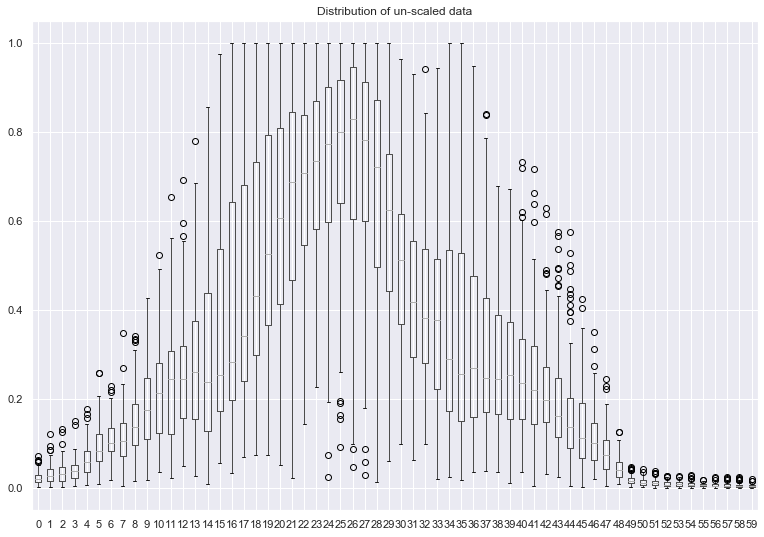

In [16]:
x_train.boxplot(column = list(np.arange(0,60,1)), figsize = (13,9))
plt.title('Distribution of un-scaled data')

In [17]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [18]:
x_train = scaler.transform(x_train)
x_train = pd.DataFrame(x_train)

Text(0.5, 1.0, 'Distribution of scaled data')

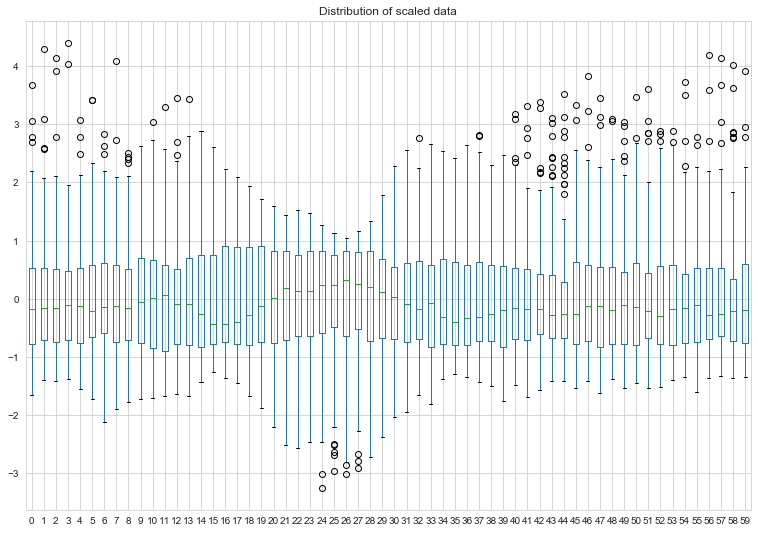

In [19]:
x_train.boxplot(column = list(np.arange(0,60,1)), figsize = (13,9))
plt.title('Distribution of scaled data')

In [20]:
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test)

[ 19.4   34.04  44.36  50.38  55.67  60.22  63.78  66.86  69.65  72.16
  74.46  76.45  78.23  79.97  81.58  83.1   84.5   85.83  87.1   88.2
  89.23  90.21  91.09  91.9   92.68  93.4   94.05  94.69  95.28  95.82
  96.32  96.75  97.16  97.5   97.83  98.09  98.34  98.55  98.75  98.93
  99.09  99.23  99.35  99.46  99.56  99.63  99.7   99.75  99.79  99.83
  99.87  99.9   99.92  99.94  99.96  99.97  99.98  99.99 100.   100.  ]


Text(0.5, 0, 'n_components')

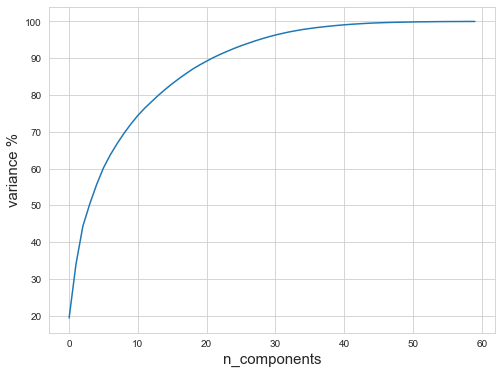

In [21]:
pca = PCA(n_components=60)
pca.fit(x_train)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explained
varr=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print( varr)
plt.figure(figsize = (8,6))
plt.plot(varr)
plt.ylabel('variance %', fontsize = 15)
plt.xlabel('n_components', fontsize = 15)

In [22]:
pca = PCA(n_components = 35)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_train_pca.shape

(117, 35)

In [23]:
x_test_pca = pca.transform(x_test)
x_test_pca.shape

(51, 35)

In [24]:
x_train_pca.shape, x_test_pca.shape

((117, 35), (51, 35))

Text(0.5, 1, 'Correlation Heatmap of Principle Components')

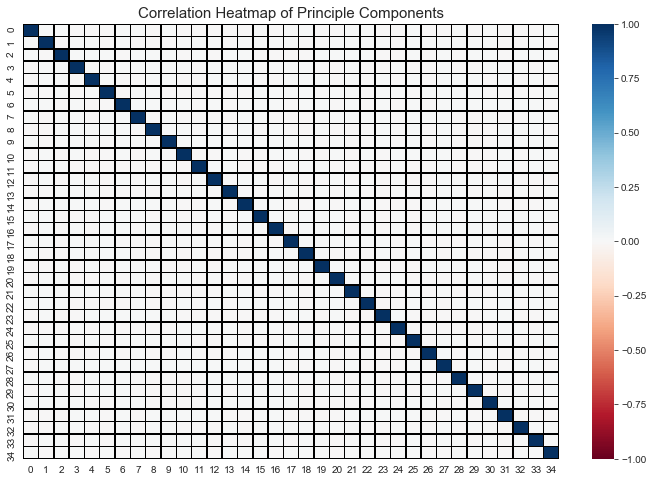

In [25]:
plt.figure(figsize = (12,8))
sb.heatmap(pd.DataFrame(x_train_pca).corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black')
sb.set_style('whitegrid')
plt.title('Correlation Heatmap of Principle Components', fontsize = 15)

From above correlation heatmap it is obvious that by using PCA we have no multi-collinearity problem in our data.

In [26]:
y_train.shape, y_test.shape

((117,), (51,))

### Base model evaluation

model: RandomForestClassifier(random_state=42)
CV score:0.7181818181818183
score_std: 0.0752101433090355
----------
model: LogisticRegression()
CV score:0.734848484848485
score_std: 0.09600610249964177
----------
model: SVC()
CV score:0.8053030303030304
score_std: 0.07423082778944813
----------
model: AdaBoostClassifier()
CV score:0.718939393939394
score_std: 0.08091887921723893
----------
model: GradientBoostingClassifier(random_state=42)
CV score:0.7363636363636364
score_std: 0.114581924609422
----------
model: KNeighborsClassifier()
CV score:0.7257575757575758
score_std: 0.11832741614042079
----------
model: XGBClassifier()
CV score:0.7606060606060606
score_std: 0.0834847109936722
----------
model: GaussianNB()
CV score:0.718939393939394
score_std: 0.09656936777028148
----------


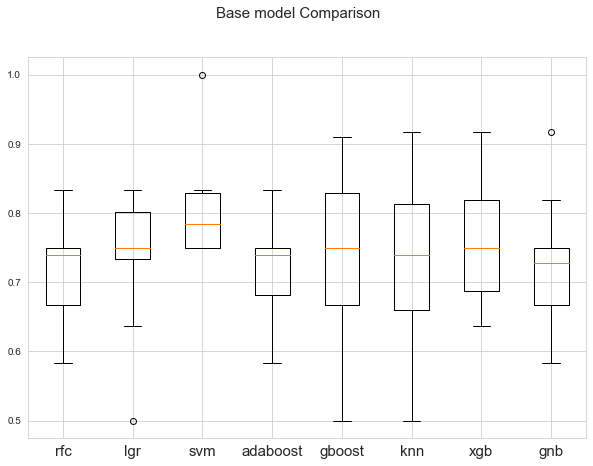

In [27]:
rfc = RandomForestClassifier(random_state = 42)
lgr = LogisticRegression()
svm = SVC()
adaboost =  AdaBoostClassifier()
gboost = GradientBoostingClassifier(random_state = 42)
knn = KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
gnb = GaussianNB()
models = [rfc, lgr, svm, adaboost, gboost, knn, xgb, gnb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train_pca, y_train, cv = k, scoring = 'accuracy', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfc', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb', 'gnb'],
                  fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

From above results,based on mean score and spread of score it is reasonable to choose only svm, lgr, xgb and gboost algorithms for further tuning.

### Hyper-parameter Tuning

In [28]:
param_svm = dict(kernel = ['rbf','poly','sigmoid','linear'], gamma = np.arange(0.25,3,0.25), degree = [2,3,4,5],
             C =np.logspace(4,-4,60))

param_gboost =  dict(
   learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
   max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
   n_estimators = [100, 150, 200],
   min_samples_split = [1,2,3],
   min_samples_leaf = [1,2])

param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ])

param_lgr = dict(penalty = ['l1','l2'],  C = np.logspace(4,-4,60), 
                 solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 max_iter = [100,150,200,250,300])

In [29]:
model_param_list = [(svm,param_svm) , ( gboost,param_gboost), ( xgb,param_xgb), (lgr,param_lgr)]

In [30]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    grid = GridSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'accuracy')
    grid.fit(x_train_pca, y_train)
    best_cvscore = grid.best_score_
    best_param = grid.best_params_
    best_estimator = grid.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')  

print('best_estimators:',best_estimator_list)

model: SVC()
best_cvscore: 0.8151515151515152
best_param: {'C': 0.0003486365227678088, 'degree': 3, 'gamma': 0.25, 'kernel': 'poly'}


model: GradientBoostingClassifier(random_state=42)
best_cvscore: 0.8037878787878787
best_param: {'learning_rate': 0.25, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


model: XGBClassifier()
best_cvscore: 0.787878787878788
best_param: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1}


model: LogisticRegression()
best_cvscore: 0.7606060606060606
best_param: {'C': 0.6260516572014815, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


best_estimators: [SVC(C=0.0003486365227678088, gamma=0.25, kernel='poly'), GradientBoostingClassifier(learning_rate=0.25, n_estimators=150,
                           random_state=42), XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6), LogisticRegression(C=0.6260516572014815, penalty='l1', solver='lib

Now we shall test the tuned model with both train and test data for final selection of model.

In [31]:
for model in best_estimator_list:
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_train_pca)
    score = accuracy_score(y_train, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')



model SVC(C=0.0003486365227678088, gamma=0.25, kernel='poly')
accuracy %: 99.14529914529915


model GradientBoostingClassifier(learning_rate=0.25, n_estimators=150,
                           random_state=42)
accuracy %: 100.0


model XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6)
accuracy %: 100.0


model LogisticRegression(C=0.6260516572014815, penalty='l1', solver='liblinear')
accuracy %: 91.45299145299145




In [32]:
for model in best_estimator_list:
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca)
    score = accuracy_score(y_test, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')


model SVC(C=0.0003486365227678088, gamma=0.25, kernel='poly')
accuracy %: 94.11764705882352


model GradientBoostingClassifier(learning_rate=0.25, n_estimators=150,
                           random_state=42)
accuracy %: 76.47058823529412


model XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6)
accuracy %: 84.31372549019608


model LogisticRegression(C=0.6260516572014815, penalty='l1', solver='liblinear')
accuracy %: 90.19607843137256




From above train and test score result it is evident that the GrandientBoost model overfitted the trianing set
and hence was not able to generalize well on unseen(test data), whereas SVM model on the other hand 
was able to generalize well on test set as compared to other models. Hence, we choose SVM model as our
classifier in this project.